In [85]:
import os
import pandas as pd
from scipy.stats import kendalltau, spearmanr
import matplotlib.pyplot as plt

In [86]:

from dotenv import load_dotenv


def evaluate_top_10_percent(csv_path):
    """
    Evaluate MAP, Kendall's Tau, and Spearman Rank Correlation for the top 10% of data in a CSV.

    Args:
        csv_path (str): Path to the CSV file containing `Node_Index`, `Label`, and `Prediction`.

    Returns:
        dict: A dictionary containing `map`, `kendall_tau`, and `spearman_corr` for the top 10%.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Sort by Predictions in descending order
    df_sorted = df.sort_values(by='Prediction', ascending=False)

    # Select the top 10% of the data
    top_10_percent = int(len(df_sorted) * 0.1)
    df_top_10 = df_sorted.head(top_10_percent)

    # Compute Mean Average Precision (MAP)
    def compute_map(labels):
        threshold = df['Label'].quantile(0.9)  # Top 20% most influential nodes
        relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
        cumsum = 0
        total_relevant = sum(relevance)
        if total_relevant == 0:
            return 0.0  # Avoid division by zero if no relevant items
        for i, rel in enumerate(relevance, start=1):
            if rel:
                cumsum += sum(relevance[:i]) / i
        return cumsum / total_relevant

    # MAP for the top 10%
    map_top_10 = compute_map(df_top_10['Label'])

    # Kendall's Tau and Spearman Rank Correlation
    kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
    spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

    # Return the results as a dictionary
    return {
        'map': map_top_10,
        'kendall_tau': kendall_tau,
        'spearman_corr': spearman_corr
    }


# parameters
load_dotenv("./model.env")
sir_alpha = int(os.getenv("SIR_ALPHA"))
print('SIR_ALPHA: ', sir_alpha)
_model_L  = int(os.getenv("_MODEL_L"))
print('_MODEL_L: ', _model_L)
num_epochs = int(os.getenv("NUM_EPOCH"))
print('NUM_EPOCH: ', num_epochs)

save_folder = f'test_L{_model_L}_b4_sir{sir_alpha}'


# Example usage

csv_path = f'./../data/{save_folder}/ba_edgelist_exp1_5000_4_df.csv'  # Replace with the actual path
results = evaluate_top_10_percent(csv_path)
print(f"MAP: {results['map']:.4f}")
print(f"Kendall's Tau: {results['kendall_tau']:.4f}")
print(f"Spearman Rank Correlation: {results['spearman_corr']:.4f}")


SIR_ALPHA:  0
_MODEL_L:  9
NUM_EPOCH:  200
MAP: 0.7365
Kendall's Tau: 0.5355
Spearman Rank Correlation: 0.7096


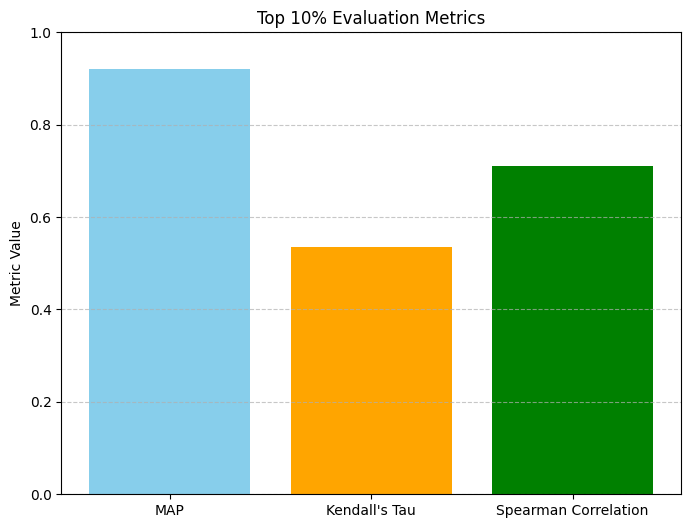

Results: {'MAP': 0.9202909065553646, "Kendall's Tau": 0.5354751440698078, 'Spearman Correlation': 0.7095613724450875}


In [87]:
import pandas as pd
from scipy.stats import kendalltau, spearmanr
import matplotlib.pyplot as plt

def evaluate_and_plot_top_10_percent(csv_path):
    """
    Evaluate MAP, Kendall's Tau, and Spearman Rank Correlation for the top 10% of data in a CSV
    and plot the results.

    Args:
        csv_path (str): Path to the CSV file containing `Node_Index`, `Label`, and `Prediction`.

    Returns:
        dict: A dictionary containing `map`, `kendall_tau`, and `spearman_corr` for the top 10%.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Sort by Predictions in descending order
    df_sorted = df.sort_values(by='Prediction', ascending=False)

    # Select the top 10% of the data
    top_10_percent = int(len(df_sorted) * 0.1)
    df_top_10 = df_sorted.head(top_10_percent)

    # Compute Mean Average Precision (MAP)
    def compute_map(labels):
        threshold = df['Label'].quantile(0.8)  # Top 20% most influential nodes
        relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
        cumsum = 0
        total_relevant = sum(relevance)
        if total_relevant == 0:
            return 0.0  # Avoid division by zero if no relevant items
        for i, rel in enumerate(relevance, start=1):
            if rel:
                cumsum += sum(relevance[:i]) / i
        return cumsum / total_relevant

    # MAP for the top 10%
    map_top_10 = compute_map(df_top_10['Label'])

    # Kendall's Tau and Spearman Rank Correlation
    kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
    spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

    # Store results in a dictionary
    results = {
        'MAP': map_top_10,
        'Kendall\'s Tau': kendall_tau,
        'Spearman Correlation': spearman_corr
    }

    # Plotting the results
    metrics = list(results.keys())
    values = list(results.values())

    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
    plt.ylabel("Metric Value")
    plt.title("Top 10% Evaluation Metrics")
    plt.ylim(0, 1)  # Since these metrics range between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return results

# Example usage
csv_path = f'./../data/{save_folder}/ba_edgelist_exp1_5000_4_df.csv'  # Replace with the actual path
results = evaluate_and_plot_top_10_percent(csv_path)
print(f"Results: {results}")


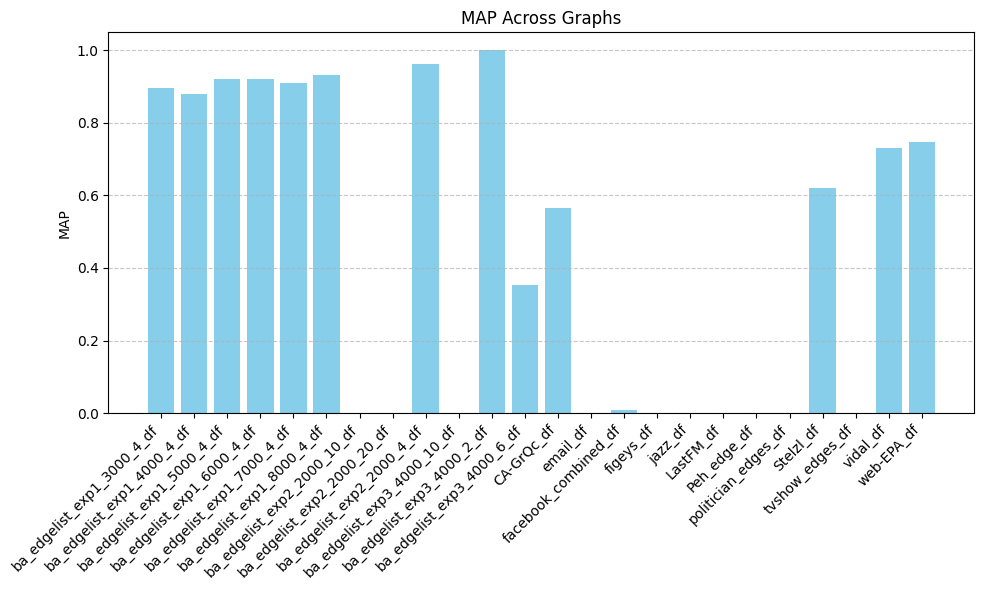

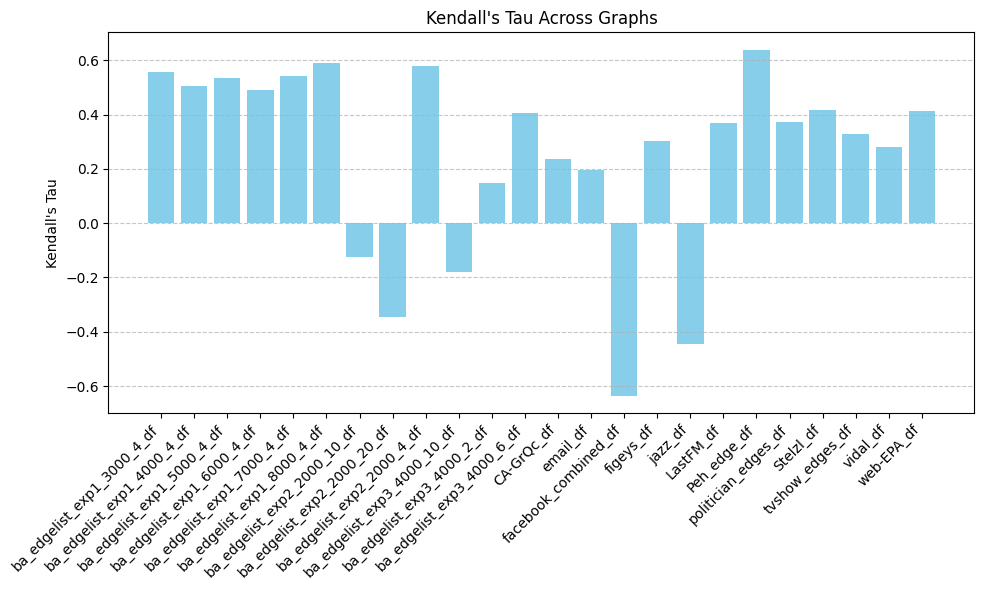

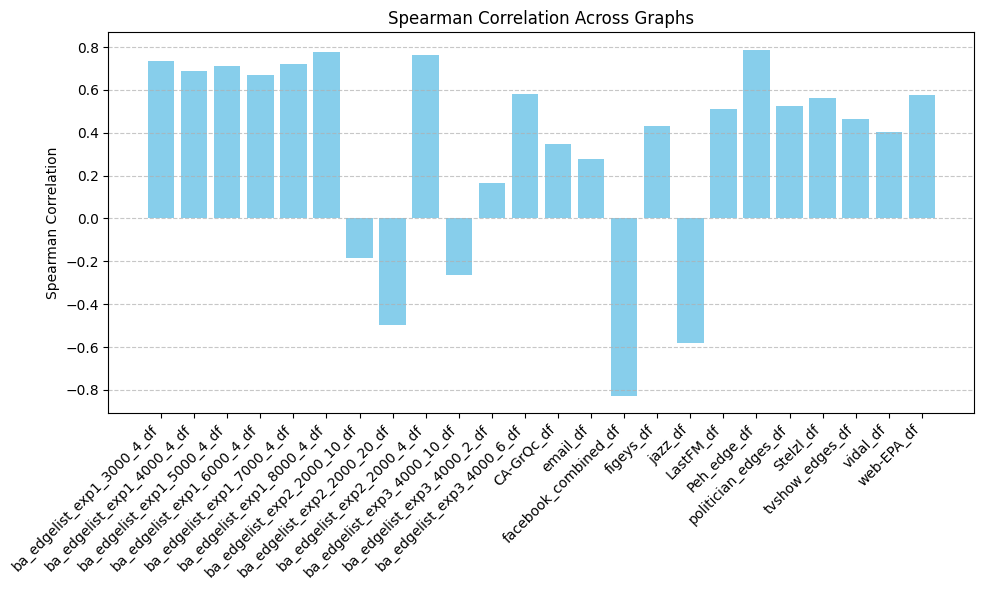

                          Graph       MAP  Kendall's Tau  Spearman Correlation
0    ba_edgelist_exp1_3000_4_df  0.897165       0.557316              0.733696
1    ba_edgelist_exp1_4000_4_df  0.881280       0.504866              0.686599
2    ba_edgelist_exp1_5000_4_df  0.920291       0.535475              0.709561
3    ba_edgelist_exp1_6000_4_df  0.920013       0.490098              0.667649
4    ba_edgelist_exp1_7000_4_df  0.909136       0.541429              0.720042
5    ba_edgelist_exp1_8000_4_df  0.931054       0.591451              0.776831
6   ba_edgelist_exp2_2000_10_df  0.000000      -0.124120             -0.182461
7   ba_edgelist_exp2_2000_20_df  0.000000      -0.344314             -0.497424
8    ba_edgelist_exp2_2000_4_df  0.962836       0.580246              0.763602
9   ba_edgelist_exp3_4000_10_df  0.000000      -0.179280             -0.264514
10   ba_edgelist_exp3_4000_2_df  1.000000       0.146114              0.164263
11   ba_edgelist_exp3_4000_6_df  0.354438       0.40

In [88]:


def analyze_and_plot_metrics_in_folder(folder_path):
    """
    Analyze and plot MAP, Kendall's Tau, and Spearman Rank Correlation for all CSVs in a folder.

    Args:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        pd.DataFrame: A DataFrame containing the metrics for all graphs.
    """
    # Get all CSV file paths in the folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    graph_names = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]

    # Initialize a list to store results
    results = []

    for csv_path, graph_name in zip(csv_files, graph_names):
        # Load the CSV file
        df = pd.read_csv(csv_path)

        # Sort by Predictions in descending order
        df_sorted = df.sort_values(by='Prediction', ascending=False)

        # Select the top 10% of the data
        top_10_percent = int(len(df_sorted) * 0.1)
        df_top_10 = df_sorted.head(top_10_percent)

        # Compute Mean Average Precision (MAP)
        def compute_map(labels):
            threshold = df['Label'].quantile(0.8)  # Top 20% most influential nodes
            relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
            cumsum = 0
            total_relevant = sum(relevance)
            if total_relevant == 0:
                return 0.0  # Avoid division by zero if no relevant items
            for i, rel in enumerate(relevance, start=1):
                if rel:
                    cumsum += sum(relevance[:i]) / i
            return cumsum / total_relevant

        map_top_10 = compute_map(df_top_10['Label'])

        # Kendall's Tau and Spearman Rank Correlation
        kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
        spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

        # Append the results for this graph
        results.append({
            'Graph': graph_name,
            'MAP': map_top_10,
            'Kendall\'s Tau': kendall_tau,
            'Spearman Correlation': spearman_corr
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Plot each metric
    metrics = ['MAP', 'Kendall\'s Tau', 'Spearman Correlation']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.bar(results_df['Graph'], results_df[metric], color='skyblue')
        plt.ylabel(metric)
        plt.title(f"{metric} Across Graphs")
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return results_df


folder_path = f'./../data/{save_folder}'  # Replace with your actual folder path
results_df = analyze_and_plot_metrics_in_folder(folder_path)
print(results_df)


In [89]:
avg_map = results_df['MAP'].mean()
avg_kendall_tau = results_df["Kendall's Tau"].mean()
avg_spearman_corr = results_df['Spearman Correlation'].mean()

# Print the average values
print(f"Average MAP: {avg_map}")
print(f"Average Kendall's Tau: {avg_kendall_tau}")
print(f"Average Spearman Correlation: {avg_spearman_corr}")

Average MAP: 0.43529747457137563
Average Kendall's Tau: 0.2571947803689913
Average Spearman Correlation: 0.3475459140832709
